# **MultiModal RAG App for Video Processing With LlamaIndex and LanceDB**

### 1. llamaindex framework
### 2. Lancedb Vector DataBase
### 3. LLM MultiModAl GPT-4V or Google-gemini-pro-vision


# **Steps Need to follow:**
#### 1. Download video from YouTube, process and store it.

#### 2. Build Multi-Modal index and vector store for both texts and images.

#### 3. Retrieve relevant images and context, use both to augment the prompt.

#### 4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [1]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-embeddings-clip
%pip install git+https://github.com/openai/CLIP.git
!pip install llama-index-readers-file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 141.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-af5q5xh4
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-af5q5xh4
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369549 sha256=208169482cd9b91a18463da9f895d2d95416f32f8d5b6342f7d58e72a201690e
  Stored in directory: /tmp/pip-ephem-wheel-cache-jf2194m0/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.5/323.5 kB 10.4 MB/s eta 0:00:00


In [2]:
%pip install llama_index
%pip install -U openai-whisper

INFO: pip is looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-2025

In [3]:
%pip install lancedb
%pip install moviepy
%pip install yt_dlp
# %pip uninstall pytube -y
# %pip install git+https://github.com/pytube/pytube
# %pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.9/175.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 49.8 MB/s eta 0:00:00


ffmpeg-library enables you to use FFmpeg in Python to manipulate various media files for different purposes like building comprehensive multimedia applications, preprocessing media files.

MoviePy is a Python library for video editing, enabling cutting, concatenations, title insertions, video compositing, and effects like animations or color grading.

Pytube is a Python library used for downloading videos from YouTube. It supports downloading in various formats, resolutions, and also direct audio extraction.


Pydub is a Python library for audio manipulation, enabling easy loading,
editing, and exporting of audio files in various formats with minimal code.

The SpeechRecognition library in Python allows you to convert spoken language into text using various engines and APIs, such as Google Speech Recognition, IBM Speech to Text, etc.


SoundFile is a Python library for reading from and writing to audio files, supporting many formats through the libsndfile library, ideal for high-quality audio processing.

FTFY (Fix Text For You) is a Python library that fixes broken Unicode text and mojibake (garbled text due to encoding issues), making text legible again.

OpenAI Whisper is a robust, multilingual speech recognition model developed by OpenAI. It converts speech into text and supports various languages with high accuracy.

pprint is a Python module that provides a capability to "pretty-print" complex data structures in a well-formatted and more readable way than the basic print function.

In [6]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
# from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
import os
from getpass import getpass

OPENAI_API_TOKEN = getpass("Enter your OpenAI API key: ")
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

Enter your OpenAI API key: ··········


In [ ]:
# import os
# from google.colab import userdata
# OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
# os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [8]:
import os
print(os.getcwd())

/content


In [9]:
# video_url="https://youtu.be/3dhcmeOTZ_Q"
video_url = "https://www.youtube.com/watch?v=tKPSmn-urB4"
# video_url = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"

In [10]:
output_video_path = "/content/video_data/"

In [11]:
# from the video i am going to collect images,audio,text
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [12]:
!mkdir mixed_data

In [13]:
filepath=output_video_path + "input_vid.mp4"
print(filepath)

/content/video_data/input_vid.mp4


In [14]:
# from pytube import YouTube
# def download_video(url,output_path):
#   yt = YouTube(url)
#   metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}

#   yt.streams.get_highest_resolution().download(
#         output_path=output_path, filename="input_vid.mp4"
#     )
#   return metadata

In [15]:
import yt_dlp

def download_video(url, output_path):
    ydl_opts = {
        'outtmpl': f'{output_path}/input_vid.%(ext)s',  # Save as input_vid.mp4
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best',
        'merge_output_format': 'mp4'
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=True)
        return {
            "Title": info.get("title"),
            "Author": info.get("uploader"),
            "Views": info.get("view_count")
        }


In [16]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [17]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [18]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [19]:
video_url

'https://www.youtube.com/watch?v=tKPSmn-urB4'

In [20]:
output_video_path

'/content/video_data/'

In [21]:
metadata_vid = download_video(video_url, output_video_path)

[youtube] Extracting URL: https://www.youtube.com/watch?v=tKPSmn-urB4
[youtube] tKPSmn-urB4: Downloading webpage
[youtube] tKPSmn-urB4: Downloading tv client config
[youtube] tKPSmn-urB4: Downloading tv player API JSON
[youtube] tKPSmn-urB4: Downloading web safari player API JSON
[youtube] tKPSmn-urB4: Downloading player 0004de42-main
[youtube] tKPSmn-urB4: Downloading m3u8 information
[info] tKPSmn-urB4: Downloading 1 format(s): 137+140
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: /content/video_data//input_vid.f137.mp4
[download] 100% of   47.65MiB in 00:00:11 at 3.99MiB/s   
[download] Destination: /content/video_data//input_vid.f140.m4a
[download] 100% of    2.72MiB in 00:00:00 at 6.11MiB/s   
[Merger] Merging formats into "/content/video_data//input_vid.mp4"
Deleting original file /content/video_data//input_vid.f140.m4a (pass -k to keep)
Deleting original file /content/video_data//input_vid.f137.mp4 (pass -k to keep)


In [22]:
metadata_vid

{'Title': 'AI Explained: What is RAG - Retrieval Augmented Generation?',
 'Author': 'Morten Rand-Hendriksen',
 'Views': 15316}

In [23]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [24]:
filepath

'/content/video_data/input_vid.mp4'

In [25]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [26]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [27]:
text_data=audio_to_text(output_audio_path)

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 96.0MiB/s]


In [28]:
text_data

" You've probably heard the story of how Reddit is selling their data to Google for AI scraping, how automatic is selling all the WordPress and Tumblr data, and now how financial times is selling their data to open AI. And this doesn't sound right, because we've been told that these AI companies are taking all this data and basically invalidating the data sources they're coming from by sharing the data so you don't get to the source. So what exactly is happening here? This is more complicated than it sounds. You see, there are two different things these AI companies can do with the data. One is use it for training, you know, building new models based on the data and they're definitely doing that in some respect. But the other one is to use the data as a grounded source. And that's really interesting. So let me explain. Here's a very simplified drawing of what happens when you use AI system like Chatchy PT. You put in a prompt, the prompt goes to the AI system and the AI system creates 

In [29]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()


Text data saved to file


In [30]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [31]:
#process the video
#image
#text

In [32]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [33]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [34]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [35]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [36]:
output_folder

'/content/mixed_data/'

In [37]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [38]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 125MiB/s]


In [39]:
retriever_engine=index.as_retriever(similarity_top_k=1, image_similarity_top_k=5)

In [40]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [41]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [42]:
query="can you tell me what is RAG?"

In [43]:
img,text=retrieve(retriever_engine,query)

**Node ID:** f0edcb84-4dc3-4c0f-96c9-e063184fe541<br>**Similarity:** 0.5835888385772705<br>**Text:** You've probably heard the story of how Reddit is selling their data to Google for AI scraping, how automatic is selling all the WordPress and Tumblr data, and now how financial times is selling the...<br>

In [44]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

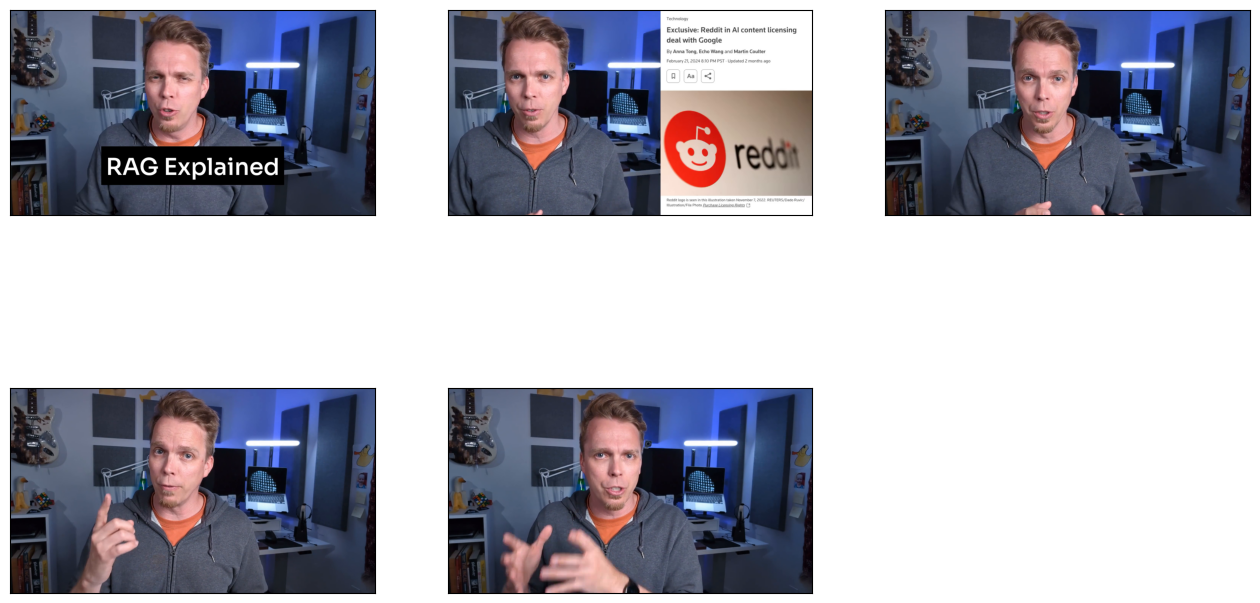

In [45]:
plot_images(img)

In [46]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [47]:
img

['/content/mixed_data/frame0000.png',
 '/content/mixed_data/frame0001.png',
 '/content/mixed_data/frame0009.png',
 '/content/mixed_data/frame0007.png',
 '/content/mixed_data/frame0033.png']

In [48]:
import json
metadata_str=json.dumps(metadata_vid)

In [85]:
query_str="can you tell me what is RAG?"

In [50]:
context_str = "".join(text)

In [67]:
image_documents = SimpleDirectoryReader( input_files=img).load_data()

In [62]:
image_documents

[ImageDocument(id_='92933f80-f806-49a1-a303-9cb63dcf04da', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 945960, 'creation_date': '2025-10-11', 'last_modified_date': '2025-10-11'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=None, image_resource=MediaResource(embeddings=None, data=None, text=None, path=PosixPath('/content/mixed_data/frame0000.png'), url=None, mimetype='image/png'), audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}'),
 ImageDocument(id_='f79d3c55-53e3-4ca7-8784-2cc7f0c73e97', embedding=None, metadata={'file_path': '/content/mixed_data/

In [82]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core.llms import ImageBlock

img_base64_bytes = [ImageBlock(image = image_document.resolve_image(as_base64=True).read()) for image_document in image_documents]

from llama_index.multi_modal_llms.openai import OpenAIMultiModal

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_TOKEN, max_new_tokens=1500
)


response_1 = openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str, query_str=query_str, metadata_str=metadata_str
    ),
    image_documents=img_base64_bytes,
)

pprint(response_1.text)

  openai_mm_llm = OpenAIMultiModal(



('RAG, or Retrieval Augmented Generation, is a process used in AI systems to '
 'improve the accuracy of responses. Instead of relying solely on pre-trained '
 'data, the AI retrieves information from a grounded source or database when a '
 "question is asked. This retrieved information is then combined with the AI's "
 'response to provide a more accurate and truthful answer. This approach helps '
 "ensure that the AI's output is based on real data, enhancing its "
 'reliability.')


In [83]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [86]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core.llms import ImageBlock

img_base64_bytes = [ImageBlock(image = image_document.resolve_image(as_base64=True).read()) for image_document in image_documents]

from llama_index.multi_modal_llms.openai import OpenAIMultiModal

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_TOKEN, max_new_tokens=1500
)


response_1 = openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        query_str=query_str, metadata_str=metadata_str
    ),
    image_documents=img_base64_bytes,
)

pprint(response_1.text)

  openai_mm_llm = OpenAIMultiModal(



('Based on the provided information, there is no context or data related to '
 'the Prime Minister of India.')
